# WELLBORE STABILITY MODEL FOR FORMATIONS WITH ANISOTRPIC ROCK STRENGTH

In [1]:
#import libraries
import numpy as np
import pandas as pd
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.stats import gamma


NECESSARY INPUT PARAMETERS

In [2]:
#Well depth (ft) 
#Overburden stress (sv, psi/ft)
#Maximum horizontal stress (sH, psi/ft)
#Azimuth of minimum horizontal stress (deg.)
#Minimum horizontal stress (sh, psi/ft)
#Pore pressure (Pp, psi/ft)
#Cohesion of rock matrix (Si, psi)
#Coefﬁcient of friction of rock matrix (mi)
#Poisson’s ratio (u) 
#Biot’s parameter (a)
#Cohesion of weak plane (Sw, psi)
#Coefﬁcient of friction of weak planes (mw, deg.)
#Dip angle of weak plane (deg.)
#Dip direction of weak plane (deg.)
#Radius of borehole(a)
#Radial distance from center of borehole(r)


INPUT VALUES IN THE FOLLOWING CELL:

In [3]:
#Variables for Calculations
d=3480

# In-situ Stress Values
sigmaH=0.8*d
sigmah=0.75*d
sigmav= 0.85*d

#In-situ stress Direction
alphas=60*0.0175
betas=0

#Input parameters (DIRECTION OF BOREHOLE)
alphab= 150*0.0175
betab=0*0.0175

#Input parameters (DIRECTION OF PLAIN OF WEAKNESS)
alphaw= 230*0.0175
betaw= 5*0.0175

#Input parameter (THETA IN CCS)
#theta

# Other Input Parameters

pp=0.42*d
alpha=1
mu=0.37

#Rock Strength parameters
si= 550
mi= 0.38
sw= 220
mw= 0.28

ROTATION MATRIX & STRESS TRANSFORMATION FOR CONVERSION OF CORDINATE SYSTEMS:

In [4]:
#Defining values for ICS to GCS
cosa= math.cos(alphas)
cosb= math.cos(betas)
sina= math.sin(alphas)
sinb= math.sin(betas)
sigmaics= np.array([[sigmah,0,0], [0,sigmaH,0], [0,0,sigmav]])
print(sigmaics)

[[2610.    0.    0.]
 [   0. 2784.    0.]
 [   0.    0. 2958.]]


In [5]:
#rotation Matrix for ICS to GCS
E= np.array([[cosa*cosb, sina*cosb, sinb], [-sina, cosa, 0], [-cosa*sinb, -sina*sinb, cosb]])
print(E)
ET= np.transpose(E)

[[ 0.49757105  0.86742323  0.        ]
 [-0.86742323  0.49757105  0.        ]
 [-0.         -0.          1.        ]]


In [6]:
#stresstransformationmatrix
sigmaics2ecs= np.dot(np.dot(ET, sigmaics), E)
print(sigmaics2ecs)

[[2740.9216111  -75.0992149    0.       ]
 [ -75.0992149 2653.0783889    0.       ]
 [   0.           0.        2958.       ]]


In [7]:
#Rotation matrix
B= np.array([[math.cos(alphab)*math.cos(betab), math.sin(alphab)*math.cos(betab), math.sin(betab)], 
            [-math.sin(alphab), math.cos(alphab), 0],
            [-math.cos(alphab)*math.sin(betab), -math.sin(alphab)*math.sin(betab), math.cos(betab)]])
print(B)
BT= np.transpose(B)

[[-0.86950718  0.4939203   0.        ]
 [-0.4939203  -0.86950718  0.        ]
 [ 0.         -0.          1.        ]]


In [8]:
#Stress transformation matrix
sigmaecs2bcs= np.dot(np.dot(B, sigmaics2ecs), BT)
print(sigmaecs2bcs)


[[ 2.78399693e+03 -7.31430521e-01  0.00000000e+00]
 [-7.31430521e-01  2.61000307e+03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.95800000e+03]]


In [9]:
#Rotation matrix
W= np.array([[math.cos(alphaw)*math.sin(betaw), math.sin(alphaw)*math.sin(betaw), math.cos(betaw)], 
            [-math.sin(alphaw), math.cos(alphaw), 0],
            [-math.cos(alphaw)*math.cos(betaw), -math.sin(alphaw)*math.cos(betaw), math.sin(betaw)]])
print(W)
WT= np.transpose(W)

[[-0.05544979 -0.06754296  0.99617432]
 [ 0.7729054  -0.63452128  0.        ]
 [ 0.6320938   0.7699485   0.08738839]]


In [10]:
x= (sigmaecs2bcs[0][0]+sigmaecs2bcs[1][1])
y= (sigmaecs2bcs[0][0]-sigmaecs2bcs[1][1])

CHECKING FAILURE FOR PLANE OF WEAKNESS:

In [11]:
theta=0
pm=0.5304*d
lists1=[]
lists2=[]
lists3=[]
while  (theta<180):
    thet=theta*0.0175
    sigmarr= pm-pp
    sigma00= x-2*y*math.cos(2*thet)-4*sigmaecs2bcs[0][1]*math.sin(2*thet)-pm-pp
    sigmazz=sigmaecs2bcs[2][2]-2*mu*y*math.cos(2*thet)-4*mu*sigmaecs2bcs[0][1]*math.sin(2*thet)-pp
    taur0= 0
    taurz= 0
    tau0z= 2*(-sigmaecs2bcs[0][2]*math.sin(2*thet)+sigmaecs2bcs[1][2]*math.cos(2*thet))
    
    sigmaccs= [[sigmarr, taur0, taurz], [taur0, sigma00, tau0z], [taurz, tau0z, sigmazz]]

   
    
    eigenvalue= la.eigvals(sigmaccs)
    
    sigma1= np.amax(abs(eigenvalue))
    sigma3= np.amin(abs(eigenvalue))
    C= [[math.cos(thet), math.sin(thet), 0], [-math.sin(thet), math.cos(thet), 0], [0,0,1]]
    
    CT= np.transpose(C)
        
    i= (np.dot(np.dot(W,BT), CT))
    j= np.dot(np.dot(i, sigmaccs), C)
    k= np.dot(np.dot(j,B), WT)
    sigmaecs2wcs= k

    
    tauw= math.sqrt((np.power((k[0][1]),2)+np.power((k[0][2]),2)))
    sigmaw= k[0][0]
    v= tauw/(mw*sigmaw+sw)
    if v>=1:
        lists1.append(theta)
        lists2.append(180+theta)
        pm=pm+0.0052*d
        continue
       
       
        
    else:
        lists3.append(pm)
        pm=0.5304*d
    theta= theta+1


        


CHECKING FAILURE FOR ROCK MATRIX:

In [12]:
theta=0
pm=0.5304*d
lists4=[]
lists5=[]
lists6=[]
while  (theta<180):

    thet=theta*0.0175
    
    sigmarr= pm-pp
    sigma00= x-2*y*math.cos(2*thet)-4*sigmaecs2bcs[0][1]*math.sin(2*thet)-pm-pp
    sigmazz=sigmaecs2bcs[2][2]-2*mu*y*math.cos(2*thet)-4*mu*sigmaecs2bcs[0][1]*math.sin(2*thet)-pp
    taur0= 0
    taurz= 0
    tau0z= 2*(-sigmaecs2bcs[0][2]*math.sin(2*thet)+sigmaecs2bcs[1][2]*math.cos(2*thet))
    
    sigmaccs= [[sigmarr, taur0, taurz], [taur0, sigma00, tau0z], [taurz, tau0z, sigmazz]]
   
    
    eigenvalue= la.eigvals(sigmaccs)
    
    sigma1= np.amax(abs(eigenvalue))
    sigma3= np.amin(abs(eigenvalue))
    
 
    u= (sigma1)/abs(((sigma3)+2*(si+mi*sigma3)*(np.sqrt(1+mi*mi) +mi)))
    
    if u>=1:
        lists4.append(theta)
        lists5.append(theta+180)
        pm=pm+0.0052*d
        continue
    
    else:
        lists6.append(pm)
        pm=0.5304*d
        theta= theta+1



PLOT FOR FAILURE PATTERN:

    GREEN: ROCK MATRIX
    RED: PLANE OF WEAKNESS

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


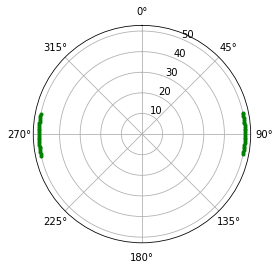

In [13]:
r=50
fig=plt.figure()
ax=fig.gca()
ax=plt.subplot(111,projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_offset(math.pi/2)
for j in range(len(lists4)):
    
    plt.polar(lists4[j]*np.pi/180, r,'g.')
    plt.polar(lists5[j]*np.pi/180,r,'g.')

for i in range(len(lists1)):
    plt.polar(lists1[i]*np.pi/180, r,'r.')
    plt.polar(lists2[i]*np.pi/180,r,'r.')
    

   

MAXIMUM MUD WEIGHT FOR ROCK MATRIX:

In [14]:
max(lists6)


1863.888

MAXIMUM MUD WEIGHT FOR PLANE OF WEAKNESS:

In [15]:
max(lists3)


1845.792